In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.metrics import accuracy_score, confusion_matrix
import random

In [2]:
# Step 1: Create Mock Dataset
np.random.seed(42)
positive_reviews = [
    "Absolutely love this product! Easy to use and very sturdy.",
    "Fantastic! Holds my phone securely and is super convenient.",
    "Best car mount ever! Reliable and doesn’t fall off.",
    "Super sturdy and well-designed. Highly recommend!",
    "Great value for the price! Works flawlessly."
]
negative_reviews = [
    "Terrible quality! Keeps falling off and is completely unreliable.",
    "Not worth the money. Very poor build and broke within a week.",
    "Disappointed. Difficult to use and not secure at all.",
    "Avoid this product! Flimsy and does not hold the phone properly.",
    "Worst purchase ever. Falls apart way too easily."
]

mock_reviews = [random.choice(positive_reviews) if i % 2 == 0 else random.choice(negative_reviews) for i in range(1000)]
mock_labels = ["Positive" if i % 2 == 0 else "Negative" for i in range(1000)]

df = pd.DataFrame({"Review": mock_reviews, "Label": mock_labels})

In [3]:
# Preprocessing Function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]', '', text)
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return words

In [4]:
df['Processed_Review'] = df['Review'].apply(preprocess_text)

In [5]:
# Step 2: Identify Keywords
keywords = {
    "positive": ["easy", "sturdy", "secure", "convenient", "reliable"],
    "negative": ["falls", "poor", "broken", "difficult", "unreliable"]
}
all_keywords = keywords["positive"] + keywords["negative"]

In [6]:
# Feature Extraction
def extract_features(review):
    return [1 if keyword in review else 0 for keyword in all_keywords]

df['Features'] = df['Processed_Review'].apply(extract_features)
X = np.array(df['Features'].tolist())
y = np.array(df['Label'].apply(lambda x: 1 if x == "Positive" else 0))

In [7]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 4: Implement Naïve Bayes from Scratch
class NaiveBayesClassifier:
    def __init__(self):
        self.priors = {}
        self.likelihoods = {}
    
    def train(self, X, y):
        n_samples, n_features = X.shape
        self.priors = {c: np.mean(y == c) for c in np.unique(y)}
        self.likelihoods = {c: (X[y == c].sum(axis=0) + 1) / (np.sum(y == c) + 2) for c in np.unique(y)}
    
    def predict(self, X):
        predictions = []
        for sample in X:
            probs = {c: np.log(self.priors[c]) + np.sum(sample * np.log(self.likelihoods[c])) for c in self.priors}
            predictions.append(max(probs, key=probs.get))
        return np.array(predictions)

In [9]:
# Train Model
nb = NaiveBayesClassifier()
nb.train(X_train, y_train)
y_pred = nb.predict(X_test)

In [10]:
# Step 5: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.84
Confusion Matrix:
[[71 32]
 [ 0 97]]


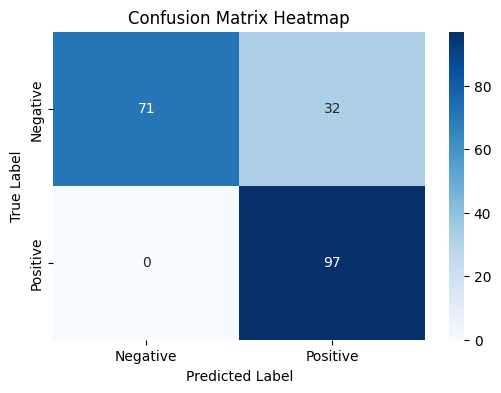

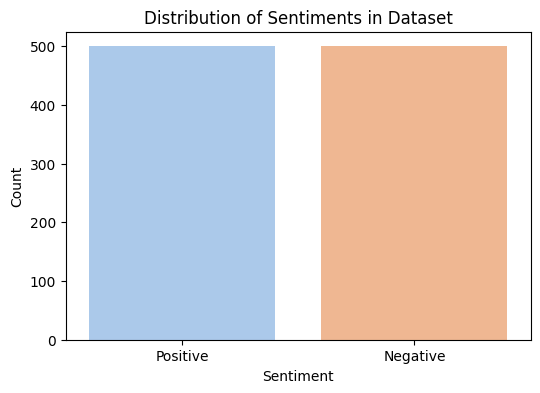

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


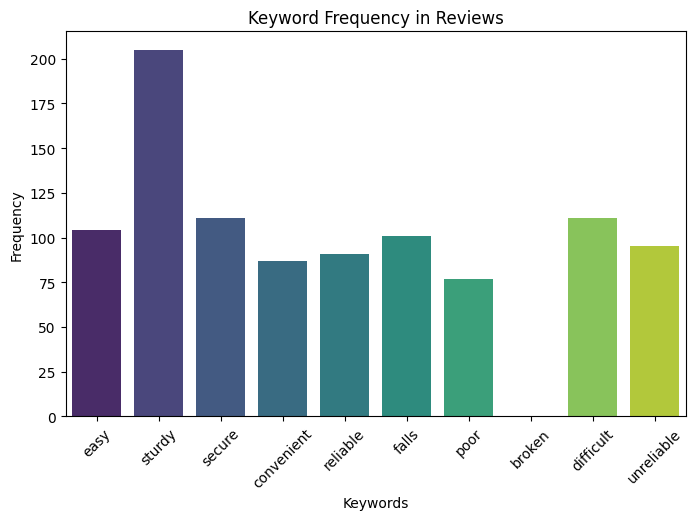

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


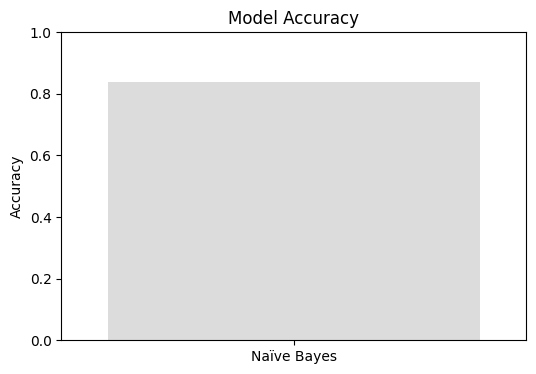

In [11]:
# Visualization
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['Label'], palette='pastel')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments in Dataset')
plt.show()

# Plot keyword frequency
word_freq = {word: sum([1 for review in df['Processed_Review'] if word in review]) for word in all_keywords}
plt.figure(figsize=(8,5))
sns.barplot(x=list(word_freq.keys()), y=list(word_freq.values()), palette='viridis')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Keyword Frequency in Reviews')
plt.xticks(rotation=45)
plt.show()

# Plot accuracy comparison
plt.figure(figsize=(6,4))
sns.barplot(x=['Naïve Bayes'], y=[accuracy], palette='coolwarm')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()